In [1]:
from ablation import *
import hickle
import os

In [2]:
best_accuracy_so_far = 0
best_accuracy_params = None

def get_best_matrix(cur_matrix, cur_params):
  global best_accuracy_so_far
  global best_accuracy_params
  if len(cur_matrix) == 0:
    run_id = get_id(cur_params)
    out_path = f"completed-experiments/{run_id}"
    if os.path.exists(f"{out_path}/main-accuracies.hkl"):
        train_accuracy, valid_accuracy = hickle.load(f"{out_path}/main-accuracies.hkl")
        print((cur_params, valid_accuracy[-1]))
        if valid_accuracy[-1] > best_accuracy_so_far:
            best_accuracy_so_far = valid_accuracy[-1]
            best_accuracy_params = cur_params
  else:
    key, options = cur_matrix[0]
    for option in options:
      new_params = cur_params.copy()
      new_params[key] = option
      get_best_matrix(cur_matrix[1:], new_params)

get_best_matrix(matrix, dict())

print(best_accuracy_params)
print(best_accuracy_so_far)

({'balanced_categories': False, 'max_training_samples': 200000, 'enable_orig': 'orig', 'enable_aug': False, 'enable_aug3': True, 'sentence_pairs': True, 'regressive_style_finetuning': False, 'lstm_bidi': False, 'lstm_hidden_size': 64, 'epochs': 20}, 0.794921875)
({'balanced_categories': False, 'max_training_samples': 200000, 'enable_orig': 'preprocess', 'enable_aug': False, 'enable_aug3': True, 'sentence_pairs': True, 'regressive_style_finetuning': False, 'lstm_bidi': False, 'lstm_hidden_size': 64, 'epochs': 20}, 0.787109375)
{'balanced_categories': False, 'max_training_samples': 200000, 'enable_orig': 'orig', 'enable_aug': False, 'enable_aug3': True, 'sentence_pairs': True, 'regressive_style_finetuning': False, 'lstm_bidi': False, 'lstm_hidden_size': 64, 'epochs': 20}
0.794921875


In [3]:
from distutils.dir_util import copy_tree

best_id = get_id(best_accuracy_params)
copy_tree(f"completed-experiments/{best_id}", ".")

import json
with open('model-config.json', 'w') as f:
    json.dump(best_accuracy_params, f)

In [4]:
ablation_param = "enable_orig"

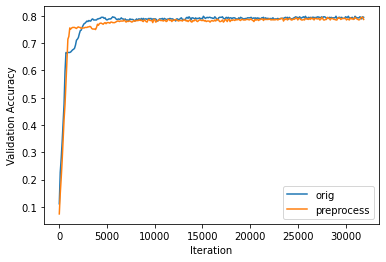

In [5]:
import matplotlib.pyplot as plt

ablation_options = None
for key, options in matrix:
    if key == ablation_param:
        ablation_options = options

for option in ablation_options:
    tweaked_dict = best_accuracy_params.copy()
    tweaked_dict[ablation_param] = option
    
    run_id = get_id(tweaked_dict)
    out_path = f"completed-experiments/{run_id}"
    if os.path.exists(f"{out_path}/main-accuracies.hkl"):
        train_accuracy, valid_accuracy = hickle.load(f"{out_path}/main-accuracies.hkl")
        plt.plot(list(map(lambda x: x * 100, range(len(valid_accuracy)))), valid_accuracy, label = str(option))
plt.xlabel("Iteration")
plt.ylabel("Validation Accuracy")
plt.legend()